# Point defect thermodynamics for ZrC

#### Objectives
- Compute vacancy formation energies and concentration in ZrC
- Compute anti-site defect formation energy
- Compute Frenkel defect formation energy
- Derive Frenkel concentration expression and calculate

### Constants

In [4]:
# Units and constants
rydberg_to_eV = 13.6056980659       # 1 Ryd is ~13.6 eV
kelvin_to_eV = 8.617333262145*10**-5 #Boltzmann constant in eV/K

### 1. Vacancies in ZrC

#### Vacancy formation energy

In [5]:
# Crystal energies calculated with quantum-espresso in Ry
e_zr4c4 = -1303.09504231  # Perfect ZrC unit cell, energy per cell
e_zr4c3 = -1284.51650624  # ZrC with C vacancy
e_zr3c4 = -995.25925222   # ZrC with Zr vacancy

e_diamond = -147.46906910/8 # Diamond crystal, energy per atom
e_zr = -614.41841918/2      # Zr crystal, energy per atom

Find the vacancy formation energy as,

$$ E_\text{form} = E_\text{defective} + \mu - E_\text{perfect}\,,$$

where $E_\text{defective}$ is the DFT energy of the cell with a vacancy, $E_\text{perfect}$ is the energy of the pristine ZrC unit cell, and $\mu$ the energy of the Zr or diamond reservoir. 

For example, for ZrC with a carbon vacancy created by placing a C atom  in diamond the formation energy is, 

$$ E_\text{form} = E(\text{Zr}_{n}\text{C}_{n-1}) + \frac{1}{n}E(C_n^\text{diamond}) - E(\text{Zr}_{n}\text{C}_{n}))  \,.$$

To find this, write a function to the print the formation energy in eV.

In [6]:
# Function to work out the vacancy formation energy in eV
def e_defect_form(perfect, vac_cell, chemical_potential, units="eV"):
    if units == "eV":
        e_form = (vac_cell + chemical_potential - perfect)*rydberg_to_eV
    elif units == "Ry":
        e_form = (vac_cell + chemical_potential - perfect)
    return e_form

In [7]:
#Carbon vacancy formation energy
e_form_c_vac = e_defect_form(e_zr4c4, e_zr4c3, e_diamond, units="eV")
e_form_c_vac

1.9714987456122153

In [8]:
#Zr vacancy formation energy
e_form_zr_vac = e_defect_form(e_zr4c4, e_zr3c4, e_zr, units="eV")
e_form_zr_vac

8.525065096981274

These vacancy formation energies have errors of the order 1 eV. This is quite substantial, but expected given our calculations are illustrative, performed with low cutoff energy and k-point sampling, and very small simulation cell. Nonetheless the values clearly show carbon vacancies are much more favourable than zirconium vacancies in ZrC. This is what expensive highly converged DFT calculations predict and talies with experimental measurements that find ZrC is substoichiometric on the C sublattice, that is to say, experimentalists observe ZrC$_x$ with x<1.

#### Vacancy concentration

The vacancy concentration $x$ in the dilute limit is given by the expression:
$$x = \text{exp}^{-E_\text{form}/(k_\text{B}T)}$$
Our vacancy total energy calculations to find $E_\text{form}$ are not close to the dilute limit, but will serve as a placeholder until we compute vacancy total energies using larger supercells. For real vacancy concentration calculations, $E_\text{form}$ must be converged with respect to supercell size!

Write a function to print the concentration of vacancies at a given tempeature using the DFT-calculated formation energies and use it to work out the concentration at 300 K.


In [9]:
#To compute concentration x, use the exponential function from the numpy (numerical  python) library. 
import numpy as np

#Define a function that will copmute the arrhenius concentration
def conc(e_formation_eV, temperature_kelvin):
    arrhenius_concentration = np.exp(-e_formation_eV/(kelvin_to_eV*temperature_kelvin))
    return arrhenius_concentration

100*conc(e_form_zr_vac, 300)

6.098312173911826e-142

At 300 K, the concentration of Zr vacancies in ZrC is practically non-existent, and for C vacancies is very small too. So we do not expect vacancies in ZrC under ambient conditions. This is useful to know as ZrC is used as a cladding material for nuclear fuels, where the presence of vacancies might alter the cladding properties. 

ZrC melts at an exceptionally high temperature. How does the concentration of Zr vacancies look at 3000 K? Write a for-loop to print temperature-concentration pairs from 3000 to 3010 K.



In [10]:
#Get an array of x-y pairs for temperature-concentration using a list comprehension
temperature_c_vac_concentration = np.array([[temperature, 100*conc(e_form_c_vac, temperature)] 
                                                for temperature in range(2000,3800)])

temperature_c_vac_concentration[:10]

array([[2.00000000e+03, 1.07656886e-03],
       [2.00100000e+03, 1.08274093e-03],
       [2.00200000e+03, 1.08894215e-03],
       [2.00300000e+03, 1.09517265e-03],
       [2.00400000e+03, 1.10143253e-03],
       [2.00500000e+03, 1.10772189e-03],
       [2.00600000e+03, 1.11404084e-03],
       [2.00700000e+03, 1.12038948e-03],
       [2.00800000e+03, 1.12676793e-03],
       [2.00900000e+03, 1.13317628e-03]])

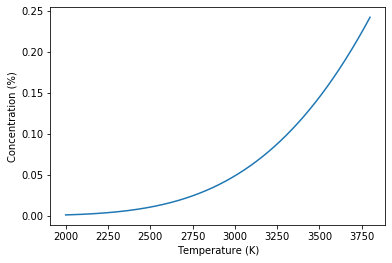

In [13]:
#To plot, first import python library matplotlib
import matplotlib.pyplot as plt

plt.plot(*temperature_c_vac_concentration.T)
plt.xlabel("Temperature (K)")
plt.ylabel("Concentration (%)")
plt.show()

Consider the limitations of our carbon vacancy concentration calculation:
- is the dilute limit Arrhenius expression appropriate for vacancies at this concentration
- does it make sense to use zero temperature DFT energy, e.g. are phonon and electron free energy terms small
- will other types of defects affect the concentration of constitutional vacancies

### 2. Antisite defect

In [12]:
# quantum-espesso total energy of ZrC with one Zr and one C site swapped
e_antisite = -1301.89318916

e_defect_form(e_zr4c4, e_antisite, 0, units="eV")

16.35205107845128

### 3. Carbon-vacancy Frenkel pair

In [14]:
# quantum-espresso energy of ZrC with a frenkel defect
e_frenkel_1 = -1302.7331864

e_defect_form(e_zr4c4, e_frenkel_1, 0, units="eV")

4.923302254821908

#### Frenkel concentration
For vacant sites, the dilute limit concentration was given by the Arrhenius expression, $x = \text{exp}^{-E_\text{form}/(k_\text{B}T)}$. However Frenkel pairs have multiple equivalent arrangements per vacancy, and we expect the concentration of Frenkel interstitial-vacancy pairs to be coupled to the constitutional vacancy concentration. 

To account for these effects we can use an a ideal solution model, in which we assume the lattice has constitutional vacancies and a single type of bound Frenkel pair defect. In this case we can write the partition function as 

$$Z = m_2^{N_2}\frac{N!}{(N-N_1-N_2)!N_1!N_2!}\,.$$

Here $N$ is the total number of sites, $N_1$ is the number of vacancies, $N_2$ is the number of Frenkel pairs, and $m_2$ is the degeneracy of the interstitial in the Frenkel pair. To determine $m_2$, we can find the interstitial point group, or by count the degeneracy visually by examining the defect structure in VESTA.

The entropy of mixing for the defect partition function is

$$S_\text{mix} = \text{ln}\,Z\,,$$

with which we can can minimise the expression

$$N_1 \Delta U_1 + N_2 \Delta U_2 = TS_\text{mix}$$

with respect to vacancy $N_1$ and Frenkel $N_2$ numbers to find

$$n_1 = (1-n_1-n_2)\text{exp}(-\Delta U_1/T)$$
and 
$$n_2 = (1-n_1-n_2)m_2\text{exp}(-\Delta U_2/T)$$
where $n_i=N_i/N$.

Questions:
1. Plot Frenkel concentration between $3000$ K and $T_\text{melt}\approx3700$ K.
2. Plot Frenkel concentration as a function of constitutional vacancy concentration at T=3000K.
3. Estimate the ratio of Frenkel pairs to vacancies vs T.
4. Derive expressions for concentration, now including a third type of defect on the lattice, the unbound Frenkel pair. This is a stoichiometric defect consisting of a C interstitial and C vacancy that are not paired.